# Surveys

* In the last decades, huge surveys of astronomical objects have been carried out, particularly by space telescopes. For example, the most exhaustive census of the galactic solar neighbourhood is made by the GAIA mission. Basic properties of more than a billion stars have been accurately measured representing roughly 1% of all stars within our galaxy. Most notably, GAIA measured stellar parallaxes, providing insight into the three-dimensional structure of the Milky Way.

Mission Objectives:

- **Stellar Positions and Motions**: Gaia's primary goal is to create the most precise 3D map of our galaxy by measuring the positions, distances, and motions of about 1% of the Milky Way's stars, which equates to over a billion stars.
- **Photometric and Spectroscopic Data**: Besides astrometry, Gaia also collects photometric data, which helps determine the physical properties of the stars, like temperature and composition. It also performs spectroscopic measurements to study the radial velocities of stars.

**Mission website**: sci.esa.int/web/gaia

**Archive website**: gea.esac.esa.int/archive

In [2]:
from google.colab import drive
drive.mount("/content/driveFiles")

Mounted at /content/driveFiles


**for real data**: https://drive.google.com/file/d/1iss_ePFOhmtEGNPCNZgLGsCDNEFziTLg/view?usp=sharing

In [3]:
dataPath = "/content/driveFiles/MyDrive/Astronomy/Project Data/csv_file/gaia_data/1704450135498O-result.csv"

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from astropy import units as u
from astropy.coordinates import SkyCoord
plt.style.use("dark_background")
%matplotlib inline

In [6]:
data = pd.read_csv(dataPath)

In [7]:
data

,l,b,parallax,parallax_over_error,radial_velocity,phot_g_mean_mag
0,30.660528,38.977769,2.862249,64.825640,-40.907120,11.476087
1,30.661481,38.977174,3.208649,40.781150,-43.597626,11.661827
2,31.180806,39.527635,4.432415,96.162506,-47.493388,11.252302
3,0.274527,-34.820599,2.398313,49.478676,13.859079,11.257838
4,313.398087,-16.218557,7.674512,322.539200,0.242497,10.113231
...,...,...,...,...,...,...
1386479,1.096280,-35.505651,2.338735,39.685814,-43.236598,11.647331
1386480,313.522811,-16.436468,4.252453,182.237700,51.125865,11.598967
1386481,30.508356,39.140991,1.467580,50.667690,-20.033739,11.465511
1386482,1.658282,-35.159374,10.841613,157.933470,45.927404,10.536817


**In the field of astrometry and galactic astronomy, 'l' and 'b' are the standard notations for galactic longitude and latitude. This notation is widely used in literature and databases dealing with galactic surveys.**

In [8]:
parallax = data["parallax"]
gMean = data["phot_g_mean_mag"]
radialVelocity = data["radial_velocity"]
# This plot reveals how stars are distributed across the Milky Way in terms of their galactic longitude and latitude.
# Clusters or voids can tell us about the structure of our galaxy.
galacticLongitude = data["l"]
galacticLatitude = data["b"]

**Parallax values should be positive because they represent the angular shift of a star due to Earth's orbit around the Sun. A negative parallax value is non-physical and typically indicates an error or an unreliable measurement.**

In [9]:
mask = parallax > 0
parallax = parallax[mask]
gMean = gMean[mask]
radialVelocity = radialVelocity[mask]

In [10]:
# Convert parallax from milliarcseconds to parsecs for distance
distance = 1.0/(parallax/1000.0)

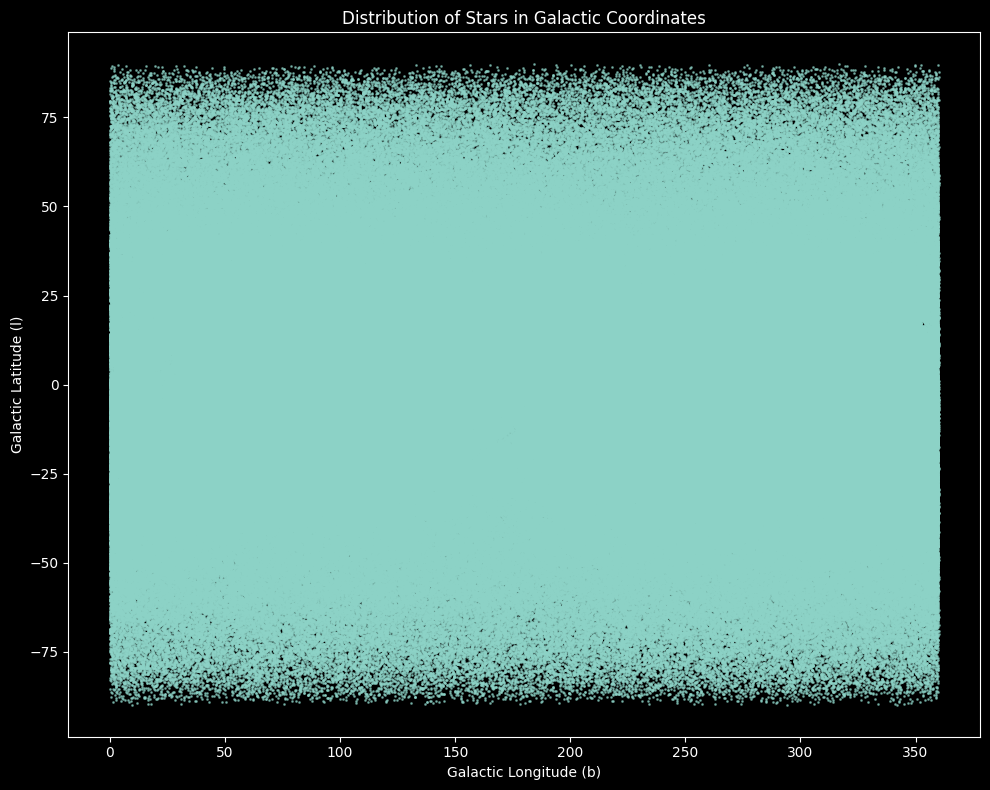

In [51]:
plt.figure(figsize=(10,8))
plt.scatter(galacticLongitude,galacticLatitude,s=1,alpha=0.6)
plt.xlabel("Galactic Longitude (b)")
plt.ylabel("Galactic Latitude (l)")
plt.title("Distribution of Stars in Galactic Coordinates")
plt.tight_layout()
plt.show()

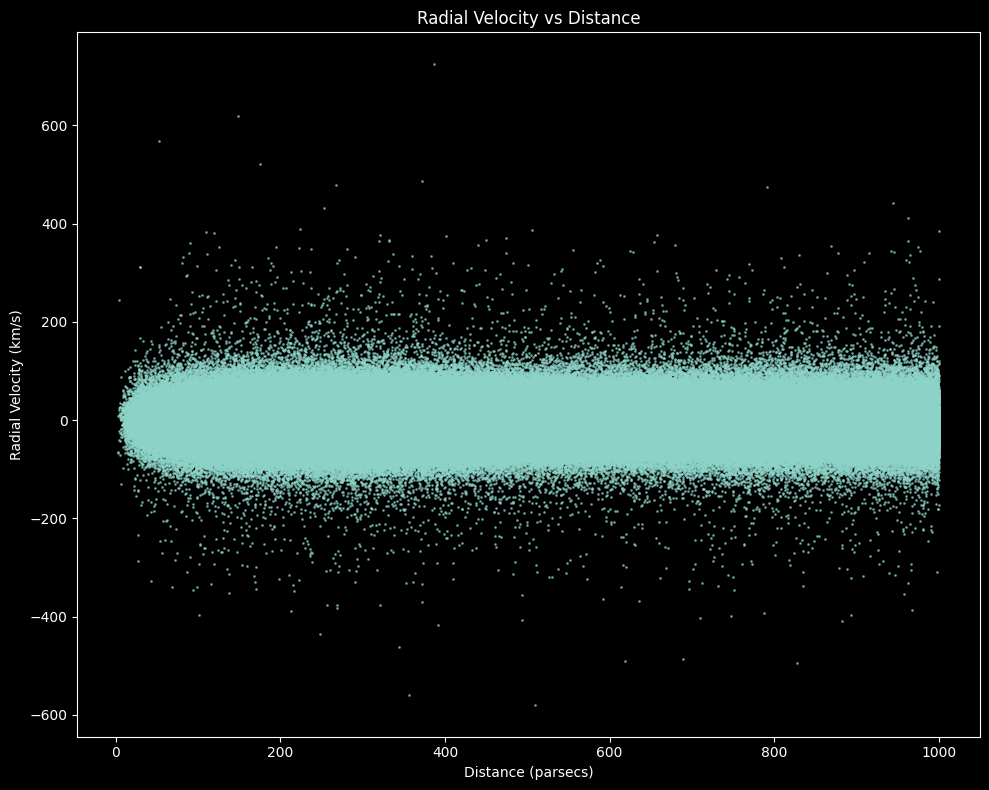

In [12]:
plt.figure(figsize=(10,8))
plt.scatter(distance,radialVelocity,s=1,alpha=0.6)
plt.xlabel("Distance (parsecs)")
plt.ylabel("Radial Velocity (km/s)")
plt.title("Radial Velocity vs Distance")
plt.tight_layout()
plt.show()

## Another Method

In [14]:
data = np.loadtxt(dataPath,dtype="float64",usecols=(0,1,2,4),delimiter=",",skiprows=1)

In [15]:
data.shape

(1386484, 4)

**Histograms are a simple means of displaying statistical properties of such data samples.**

In [16]:
distanceKPC = 1 / data[:,2]

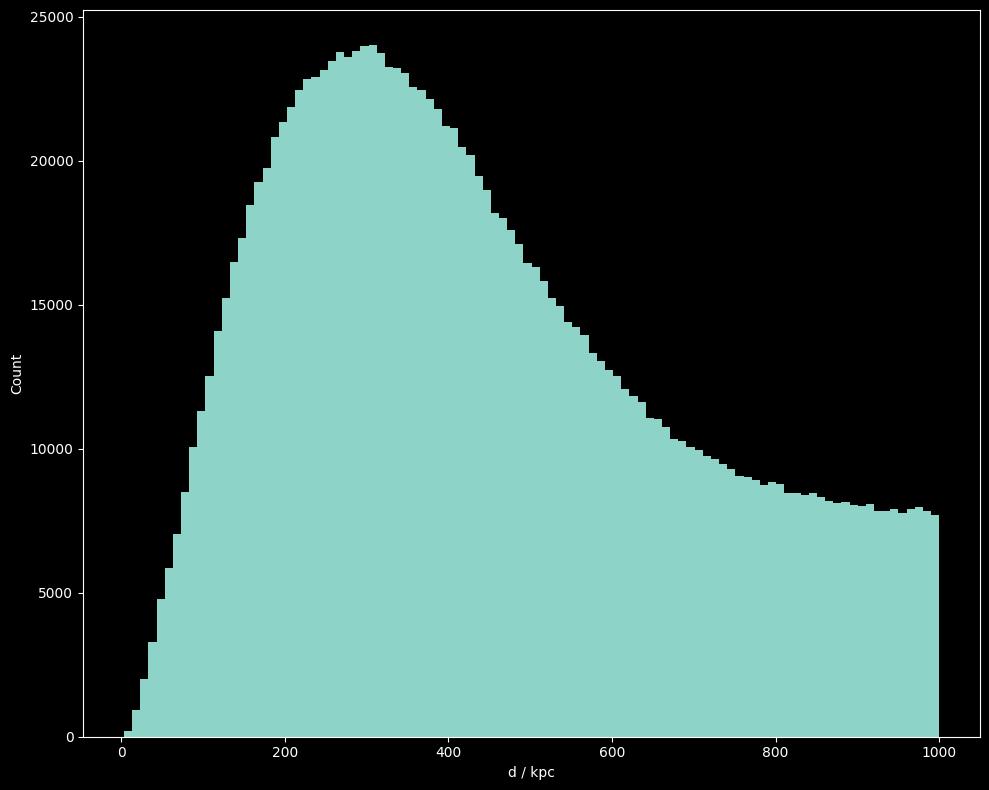

In [17]:
figure = plt.figure(figsize=(10,8))
plt.hist(distance,100)
plt.xlabel("d / kpc")
plt.ylabel("Count")
plt.tight_layout()
plt.show()

**The bin size is 1 kpc/100 = 10pc. In the close neighbourhood of the Sun, the number of stars per distance bin increases up to a maximum located roughly at 0.3 kpc. Beyond that, the number of stars per bin decreases with distance.**

In [18]:
binWidth = 2.5 # in km/s
upperLimit = 140 # upper limit

In [19]:
bins = np.arange(-upperLimit,upperLimit+binWidth,binWidth)

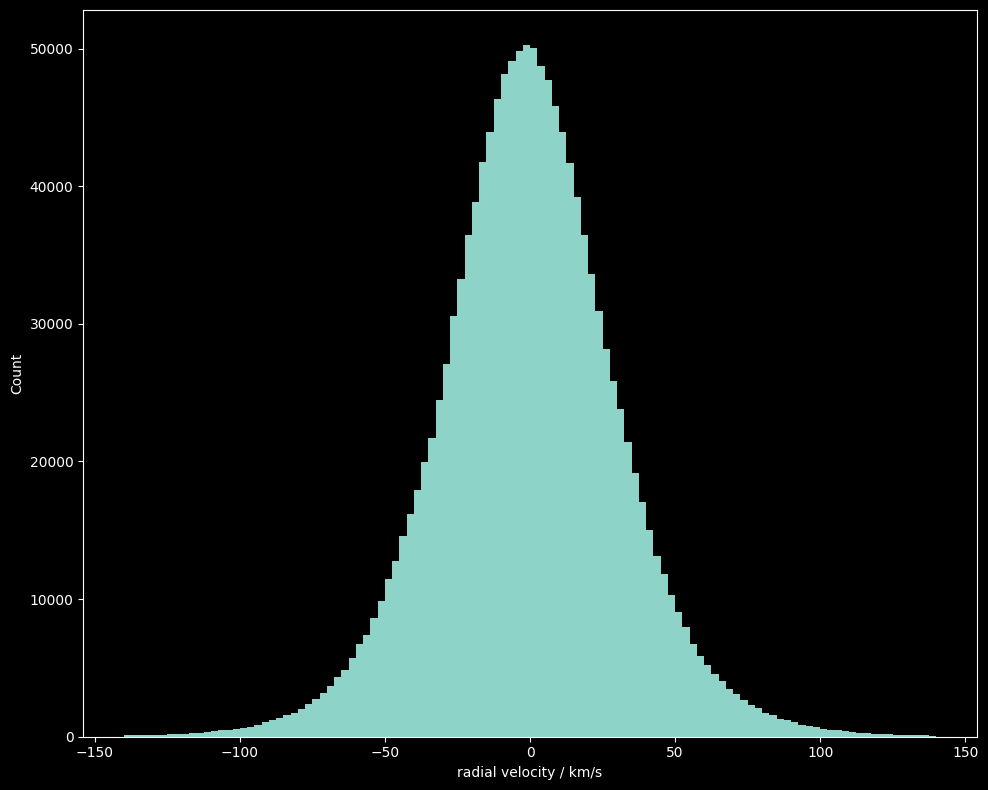

In [20]:
figure = plt.figure(figsize=(10,8))
histogram = plt.hist(data[:,3],bins=bins)
plt.xlabel("radial velocity / km/s")
plt.ylabel("Count")
plt.tight_layout()
plt.show()

## Probability Density Function & Gaussian Distribution Application

**In the case of astronomical data such as distances derived from parallax measurements, a common choice is to use a Gaussian distribution if the data is expected to cluster around a mean value with some standard deviation.**

In [52]:
import scipy.optimize as opt
from scipy.stats import ks_2samp,norm
import matplotlib.animation as animation

### What is Gaussian (normal) distribution?

In [35]:
distanceKPCValues = np.random.normal(loc=10,scale=2,size=1000) # 1000 distances with a mean of 10 kpc and std dev of 2 kpc

In [36]:
mean = np.mean(distanceKPCValues)
std = np.std(distanceKPCValues)
x = np.linspace(min(distanceKPCValues),max(distanceKPCValues),1000)
probabilityDensityFunction = norm.pdf(x,mean,std)

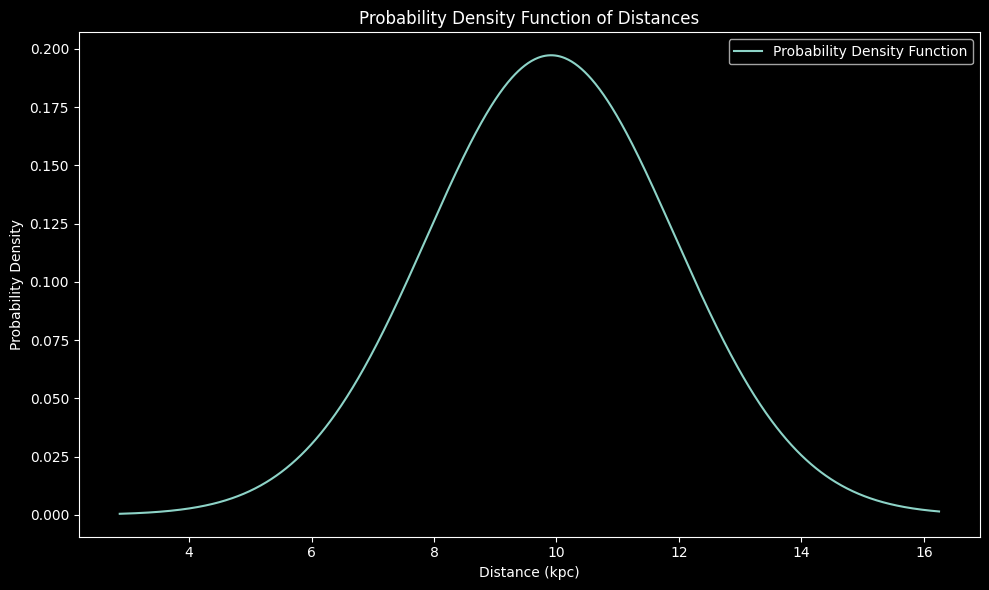

In [38]:
plt.figure(figsize=(10, 6))
plt.plot(x,probabilityDensityFunction,label="Probability Density Function")
plt.xlabel("Distance (kpc)")
plt.ylabel("Probability Density")
plt.title("Probability Density Function of Distances")
plt.legend()
plt.tight_layout()
plt.show()

### Data Usage

In [21]:
x = bins[:-1]+binWidth/2
y = histogram[0]

In [25]:
def Gaussian(x:int or float,y0:int or float,x0:int or float,sigmaSQR:int or float)->int or float:
  return y0*np.exp(-(x-x0)**2/(2*sigmaSQR))

In [26]:
parameters,parametersCovariance = opt.curve_fit(Gaussian,x,y)
print(f"Best Fitting Parameters: {parameters}")

Best Fitting Parameters: [ 4.85506870e+04 -8.95860572e-01  7.59083787e+02]


In [27]:
yGauss = Gaussian(x,parameters[0],parameters[1],parameters[2])

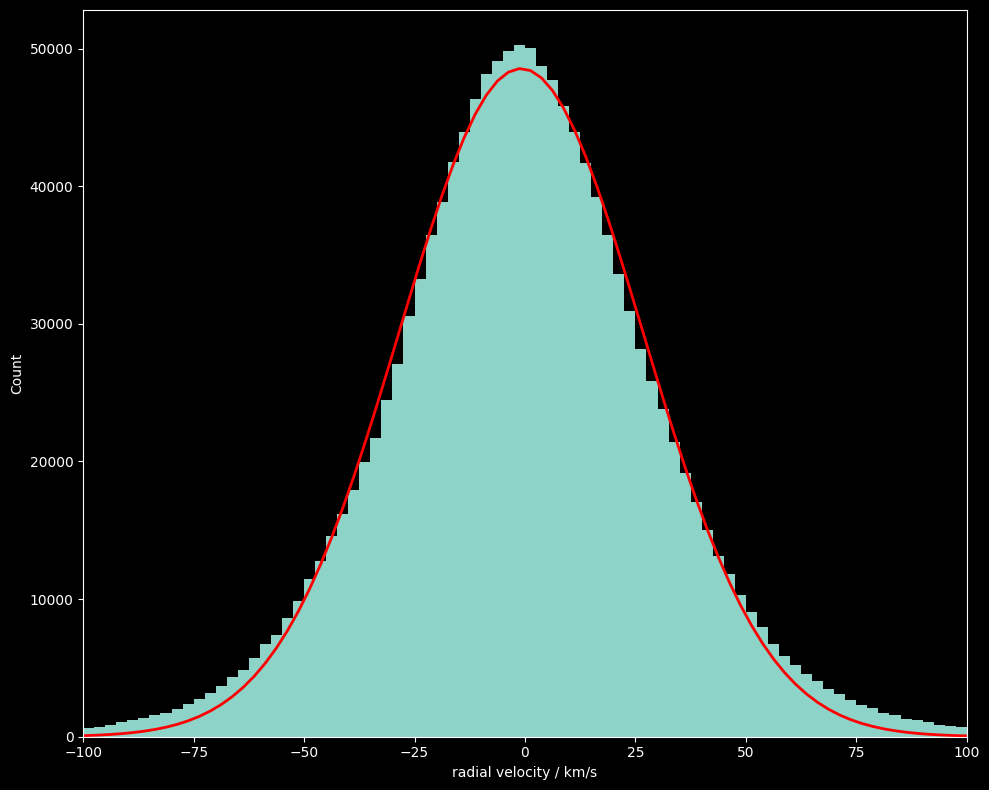

In [28]:
figure = plt.figure(figsize=(10,8))
plt.hist(data[:,3],bins=bins)
plt.plot(x,yGauss,color="red",lw=2)
plt.xlim(-100,100)
plt.xlabel("radial velocity / km/s")
plt.ylabel("Count")
plt.tight_layout()
plt.show()

In [31]:
ks_2samp(y,yGauss)

KstestResult(statistic=0.29464285714285715, pvalue=0.00010829928148128113, statistic_location=70.10866531219557, statistic_sign=-1)

**A very small p-value indicates that such an outcome is very unlikely if the null hypothesis were actually true. As a consequence, the null hypothesis can be rejected if the p-value is very small. In our case, the null hypothesis is that the data are Gaussian. Since the data appear to deviate from a Gaussian distribution, we test the statistical significance of our observation. Therefore, we can conclude that the distribution of radial velocities in the GAIA data does not strictly follow a Gaussian distribution, but shows systematic deviations.**

**Stars with positive radial velocities, which appear red-shifted, are separated from blue-shifted stars with negative radial velocity.**

In [32]:
radialVelocity = data[:,3]

In [33]:
redshiftStars,blueshiftStars = data[radialVelocity>0],data[radialVelocity<0]
print(f"Total Redshift Stars: {len(redshiftStars)}")
print(f"Total Blueshift Stars: {len(blueshiftStars)}")

Total Redshift Stars: 675676
Total Blueshift Stars: 710808


**The number of blueshifted stars is slightly larger than the number of redshifted stars, which suggests a slightly asymmetric distribution.**

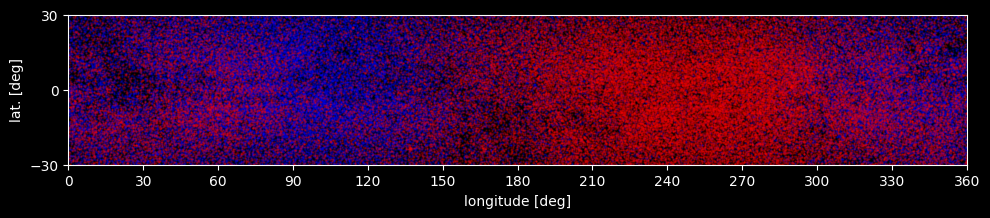

In [49]:
figure = plt.figure(figsize=(10,8))
ax = figure.add_subplot(111)
step = 7
plt.scatter(blueshiftStars[::step,0],blueshiftStars[::step,1],s=2,marker=".",color="blue",alpha=0.2)
plt.scatter(redshiftStars[::step,0],redshiftStars[::step,1],s=2,marker=".",color="red",alpha=0.2)
plt.xlabel("longitude [deg]")
plt.ylabel("lat. [deg]")
plt.xlim(0,360)
plt.ylim(-30,30)
plt.xticks([30*cn for cn in range(13)])
plt.yticks([-30,0,30])
ax.set_aspect("equal")
plt.tight_layout()
plt.show()

In [53]:
data = pd.read_csv(dataPath)

In [54]:
galLongitude = data["l"].values # Galactic Longitude
galLatitude = data["b"].values # Galactic Latitude
radialVelocity = data["radial_velocity"].values

In [57]:
maskRedshift = radialVelocity > 0
maskBlueshift = radialVelocity < 0
redshiftStars = np.column_stack((galLongitude[maskRedshift],galLatitude[maskRedshift]))
blueshiftStars = np.column_stack((galLongitude[maskBlueshift],galLatitude[maskBlueshift]))

In [63]:
redshiftStars.shape

(675676, 2)

In [59]:
redshiftStars

array([[ 2.74526897e-01, -3.48205991e+01],
       [ 3.13398087e+02, -1.62185570e+01],
       [ 1.44778273e+01,  5.36801719e+00],
       ...,
       [ 7.70583574e-01, -3.53322733e+01],
       [ 3.13522811e+02, -1.64364684e+01],
       [ 1.65828237e+00, -3.51593738e+01]])

In [64]:
blueshiftStars.shape

(710808, 2)

In [60]:
blueshiftStars

array([[ 30.66052785,  38.97776915],
       [ 30.6614815 ,  38.97717436],
       [ 31.180806  ,  39.52763486],
       ...,
       [  1.09628022, -35.50565105],
       [ 30.50835568,  39.14099148],
       [  0.92977117, -34.85656554]])

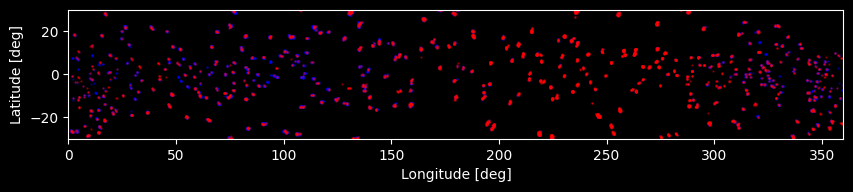

In [65]:
figure,axs = plt.subplots(figsize=(10,8))
axs.set_xlabel("Longitude [deg]")
axs.set_ylabel("Latitude [deg]")
axs.set_xlim(0,360)
axs.set_ylim(-30,30)
axs.set_aspect("equal")
def Animate(frame)->None:
  axs.clear()
  axs.set_xlim(0,360)
  axs.set_ylim(-30,30)
  axs.set_xlabel("Longitude [deg]")
  axs.set_ylabel("Latitude [deg]")
  step = 7*frame
  axs.scatter(blueshiftStars[:step,0],blueshiftStars[:step,1],s=2,marker=".",color="blue",alpha=0.4)
  axs.scatter(redshiftStars[:step,0],redshiftStars[:step,1],s=2,marker=".",color="red",alpha=0.4)
anim = animation.FuncAnimation(figure,Animate,frames=1000,interval=100,repeat=False)
anim.save("bluered.mp4",writer="ffmpeg",fps=15)
plt.show()